### 模型调优

- **模型调优（Model Tuning）**

> **网格搜索**

> **随机搜索**

> **交叉验证**

> **网格搜索**

> **网格搜索，是在所有候选的参数祖安泽中，通过循环遍历，尝试每种可能性，表现最好的参数就是最终的结果！**

> **模型参数（Model Parameters）,是模型在训练过程中学习的内容**

> **模型超参数（Model Hyperparameters），被认为是机器学习算法的最好设置，该算法是由数据科学家在训练之前设置的**

> **通过改变模型中欠拟合和过拟合的平衡来控制影响模型性能的超参数。当我们的模型不够复杂（它没有足够的自由度）来学习从特征到目标的映射时，就是欠拟合（Underfitting）。一个欠拟合的模型有很高的偏置（bias），我们可以改变我们的模型使其更复杂来纠正**

> **过拟合（Overfitting）是当我们的模型基本上拟合了所有训练数据点的时候。过拟合模型具有很高的方差（variance），我们可以通过正则化（regularization）来限制模型的复杂性来纠正。欠拟合和过拟合模型都不能很好地适用于测试数据（testdata）。**



> **随机搜索（Random Search）是指我们用来选择超参数的技术。我们定义一个网格，然后随机抽样不同的组合，而不是网格搜索（grid search），我们会彻底地尝试每一个组合。（令人惊讶的是，随机搜索的结果几乎和网格搜索一样，但大大缩短了运行时间。）**

> **交叉验证（Cross Validation）是我们用来评估所选超参数组合的技术。 我们使用K折交叉验证，而不是将训练集分成单独的训练集和验证集，这会减少我们可以使用的训练数据量。交叉验证涉及到将训练数据分成K个folds，然后经历一个迭代过程，在这个迭代过程中，我们首先训练前K-1个folds的数据，然后在第K个fold的数据上进行评估表现。我们重复这个过程K次，在K-fold交叉验证结束时，我们将每个K次迭代的平均误差作为最终的性能度量。**

> **[K=5的K-fold Cross Validation的过程如下所示](https://blog.csdn.net/Crafts_Neo/article/details/80489358)：**

<img align="left" style="padding-left:1px;" src="5FoldCV.png">

> ### 使用交叉验证执行网格搜索 vs. 使用交叉验证执行网格搜索 的整个过程

> **1.建立一个待评估超参数网格**

> **2.随机抽样一组超参数**

> **3.用选定的组合创建一个模型**

> **4.使用K-fold交叉验证评估模型**

> **5.确定哪些超参数运行得最好**

### 任务说明：

- 利用 **金融数据** 来预测贷款用户是否会逾期
- 其中，**“status”** 是结果标签：**0** 表示未逾期，**1** 表示逾期

### 任务要求：

> **模型融合（Model Tuning）**

### 任务实现（模型调优）：（2 Days）

> **使用网格搜索法（Model Selection）对5个模型进行调优（调参时采用五折交叉验证【K-fold Cross Validation】的方式），并进行模型评估（Model Evaluation），运行结果。**

### 5.1 数据加载

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [12]:
# 数据集的加载
data = pd.read_csv('Dataset/data.csv')
# 剔除重复特征
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [13]:
import pickle

# 载入特征 获取label
with open('feature.pkl', 'rb') as f:
    X = pickle.load(f)

# 观测正负样本是否均衡
y = data.status
y.value_counts()

0    3561
1    1193
Name: status, dtype: int64

In [14]:
X.shape

(4754, 87)

### 5.2 数据集划分

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# 划分数据集（训练集和测试集7:3 无验证集）
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

# 特征归一化处理
std = StandardScaler()
X_train = std.fit_transform(X_train.values)
X_test = std.transform(X_test.values)

### 5.3 模型评估

In [17]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测训练集和测试集
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率Accuracy
    print('【Accuracy准确率】', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率Precision
    print('【Prediction精准率】', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率Recall
    print('【Recall召回率】', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('【F1-score】', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC取值
    print('【AUC取值】', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC Curve")

### 5.4 模型导入

> ### 导入不同分类器模型

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

> ### 5.4.1 对 LR 模型进行调优

In [19]:
lr = LogisticRegression()
param = {'C': [1e-3,0.01,0.1,1,10,100,1e3], 'penalty':['l1', 'l2']}

gsearch = GridSearchCV(lr, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train, y_train)

print('最佳参数：',gsearch.best_params_)
print('训练集的最佳分数：', gsearch.best_score_)
print('测试集的最佳分数：', gsearch.score(X_test, y_test))

最佳参数： {'C': 0.1, 'penalty': 'l1'}
训练集的最佳分数： 0.7840473771028691
测试集的最佳分数： 0.7979990609882835


【Accuracy准确率】 训练集： 0.7977 测试集： 0.8094
【Prediction精准率】 训练集： 0.7227 测试集： 0.7547
【Recall召回率】 训练集： 0.3226 测试集： 0.3399
【F1-score】 训练集： 0.4461 测试集： 0.4688
【AUC取值】 训练集： 0.8023 测试集： 0.7980


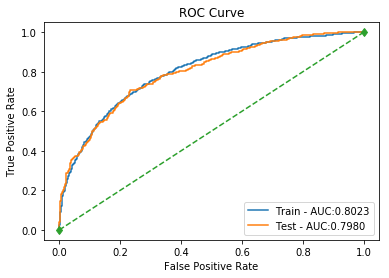

In [20]:
lr = LogisticRegression(C = 0.1, penalty = 'l1')
lr.fit(X_train, y_train)
model_metrics(lr, X_train, X_test, y_train, y_test)

> ### 5.4.2 对 SVM 进行调优

In [21]:
# 线性SVM
svm_linear = svm.SVC(kernel = 'linear', probability=True)
param = {'C':[0.01,0.1,1]}
gsearch = GridSearchCV(svm_linear, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train, y_train)

print('最佳参数：',gsearch.best_params_)
print('训练集的最佳分数：', gsearch.best_score_)
print('测试集的最佳分数：', gsearch.score(X_test, y_test))

最佳参数： {'C': 0.01}
训练集的最佳分数： 0.784442561117754
测试集的最佳分数： 0.8096707656110698


【Accuracy准确率】 训练集： 0.7854 测试集： 0.7919
【Prediction精准率】 训练集： 0.7763 测试集： 0.8256
【Recall召回率】 训练集： 0.2107 测试集： 0.2011
【F1-score】 训练集： 0.3315 测试集： 0.3235
【AUC取值】 训练集： 0.8042 测试集： 0.8097


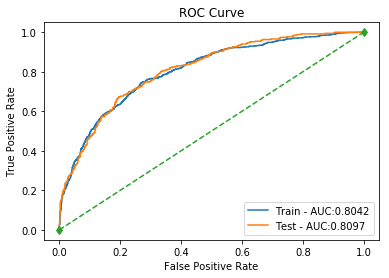

In [22]:
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True)
svm_linear.fit(X_train, y_train)
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

In [23]:
# 多项式SVM
svm_poly = svm.SVC(kernel = 'poly', probability=True)
param = {'C':[0.01,0.1,1]}
gsearch = GridSearchCV(svm_poly, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train, y_train)

print('最佳参数：',gsearch.best_params_)
print('训练集的最佳分数：', gsearch.best_score_)
print('测试集的最佳分数：', gsearch.score(X_test, y_test))

最佳参数： {'C': 0.01}
训练集的最佳分数： 0.7342238181929195
测试集的最佳分数： 0.7220235174956875


【Accuracy准确率】 训练集： 0.7532 测试集： 0.7554
【Prediction精准率】 训练集： 0.9524 测试集： 0.7500
【Recall召回率】 训练集： 0.0238 测试集： 0.0170
【F1-score】 训练集： 0.0465 测试集： 0.0332
【AUC取值】 训练集： 0.8689 测试集： 0.7220


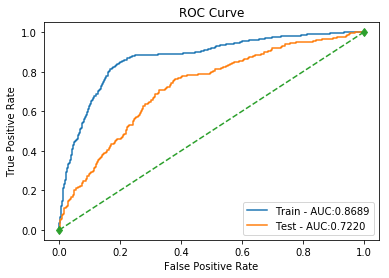

In [24]:
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True)
svm_poly.fit(X_train, y_train)
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

In [25]:
# 高斯SVM
svm_rbf = svm.SVC(probability=True)
param = {'gamma':[0.01,0.1,1,10], 
         'C':[0.01,0.1,1]}
gsearch = GridSearchCV(svm_poly, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train, y_train)

print('最佳参数：',gsearch.best_params_)
print('训练集的最佳分数：', gsearch.best_score_)
print('测试集的最佳分数：', gsearch.score(X_test, y_test))

最佳参数： {'C': 0.01, 'gamma': 0.01}
训练集的最佳分数： 0.735748513676798
测试集的最佳分数： 0.7217017213456355


【Accuracy准确率】 训练集： 0.7475 测试集： 0.7526
【Prediction精准率】 训练集： 0.0000 测试集： 0.0000
【Recall召回率】 训练集： 0.0000 测试集： 0.0000
【F1-score】 训练集： 0.0000 测试集： 0.0000
【AUC取值】 训练集： 0.8603 测试集： 0.7941


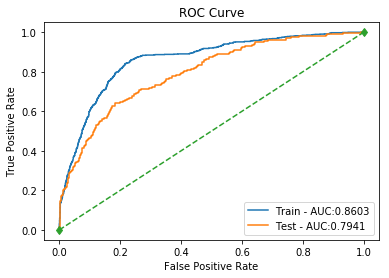

In [26]:
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True)
svm_rbf.fit(X_train, y_train)
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

In [27]:
# sigmoid - SVM
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True)
param = {'C':[0.01,0.1,1]}
gsearch = GridSearchCV(svm_sigmoid, param_grid = param,scoring ='roc_auc', cv=5)
gsearch.fit(X_train, y_train)

print('最佳参数：',gsearch.best_params_)
print('训练集的最佳分数：', gsearch.best_score_)
print('测试集的最佳分数：', gsearch.score(X_test, y_test))

最佳参数： {'C': 0.01}
训练集的最佳分数： 0.76654738176009
测试集的最佳分数： 0.8011220662478041


【Accuracy准确率】 训练集： 0.7475 测试集： 0.7526
【Prediction精准率】 训练集： 0.0000 测试集： 0.0000
【Recall召回率】 训练集： 0.0000 测试集： 0.0000
【F1-score】 训练集： 0.0000 测试集： 0.0000
【AUC取值】 训练集： 0.7768 测试集： 0.8011


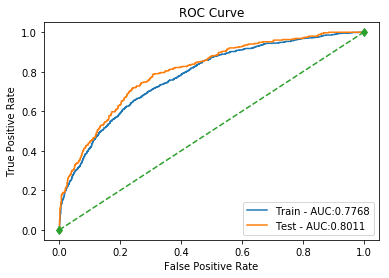

In [28]:
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)
svm_sigmoid.fit(X_train, y_train)
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

> ### 5.4.3 对 DT 决策树模型进行调优

> ### 5.4.3.1 先对决策树 max_depth 最大深度和 min_samples_split 内部结点划分所需样本数

In [29]:
param = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch = GridSearchCV(DecisionTreeClassifier(max_depth=8,min_samples_split=300,min_samples_leaf=20, max_features='sqrt',random_state =2333),
                       param_grid = param,scoring ='roc_auc', cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 7, 'min_samples_split': 300}, 0.7084691462735586)

> ### 5.4.3.2 对决策树内部结点再进一步划分所需 min_samples_split 最小样本数 和 叶子结点 min_samples_leaf 最少样本数进行调优

In [30]:
param = {'min_samples_split':range(50,1000,100), 'min_samples_leaf':range(60,101,10)}
gsearch = GridSearchCV(DecisionTreeClassifier(max_depth=11,min_samples_split=100,min_samples_leaf=20, max_features='sqrt', random_state =2333),
                       param_grid = param,scoring ='roc_auc', cv=5)

gsearch.fit(X_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'min_samples_leaf': 70, 'min_samples_split': 250}, 0.7203114469223605)

> ### 5.4.3.3 对决策树 max_features 最大特征数进行 GridSearchCV 网格搜索

In [31]:
param = {'max_features':range(7,20,2)}
gsearch = GridSearchCV(DecisionTreeClassifier(max_depth=11,min_samples_split=550,min_samples_leaf=80, max_features='sqrt', random_state =2018),
                       param_grid = param,scoring ='roc_auc', cv=5)

gsearch.fit(X_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'max_features': 15}, 0.722209470575364)

【Accuracy准确率】 训练集： 0.7788 测试集： 0.7666
【Prediction精准率】 训练集： 0.6566 测试集： 0.5820
【Recall召回率】 训练集： 0.2595 测试集： 0.2011
【F1-score】 训练集： 0.3720 测试集： 0.2989
【AUC取值】 训练集： 0.7576 测试集： 0.7382


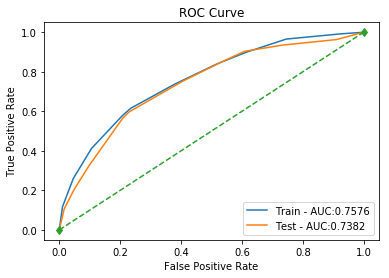

In [32]:
dt = DecisionTreeClassifier(max_depth=11,min_samples_split=550,min_samples_leaf=80,max_features=19, random_state =2018)
dt.fit(X_train, y_train)
model_metrics(dt, X_train, X_test, y_train, y_test)

> ### 5.4.4 对 RF 随机森林模型进行调优

In [33]:
rf = RandomForestClassifier(oob_score=True, random_state=2018)

【Accuracy准确率】 训练集： 0.9823 测试集： 0.7821
【Prediction精准率】 训练集： 0.9975 测试集： 0.6479
【Recall召回率】 训练集： 0.9321 测试集： 0.2606
【F1-score】 训练集： 0.9637 测试集： 0.3717
【AUC取值】 训练集： 0.9996 测试集： 0.7090


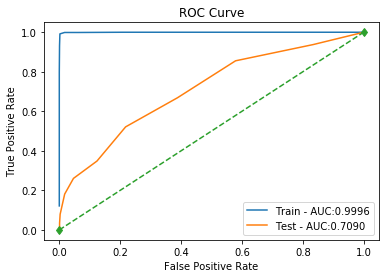

In [34]:
rf.fit(X_train, y_train.values)
model_metrics(rf, X_train, X_test, y_train, y_test)

In [35]:
# 网格法调参
param_test = {'n_estimators':range(20,200,20)}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50, \
                                                          min_samples_leaf=20, max_features = 9,random_state=2333), \
                       param_grid = param_test, scoring='roc_auc', cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 180}, 0.7855554089047098)

【Accuracy准确率】 训练集： 0.8118 测试集： 0.7940
【Prediction精准率】 训练集： 0.8794 测试集： 0.8242
【Recall召回率】 训练集： 0.2952 测试集： 0.2125
【F1-score】 训练集： 0.4421 测试集： 0.3378
【AUC取值】 训练集： 0.8952 测试集： 0.7883


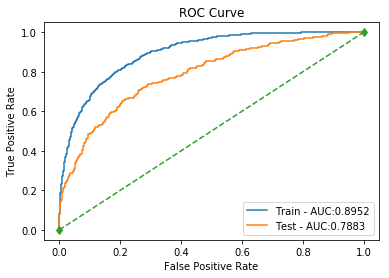

In [36]:
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2333)
rf.fit(X_train, y_train)
model_metrics(rf, X_train, X_test, y_train, y_test)

> ### 5.5 XGBoost 模型调优

> ### 默认参数

【Accuracy准确率】 训练集： 0.8533 测试集： 0.8087
【Prediction精准率】 训练集： 0.8745 测试集： 0.7273
【Recall召回率】 训练集： 0.4893 测试集： 0.3626
【F1-score】 训练集： 0.6275 测试集： 0.4839
【AUC取值】 训练集： 0.9160 测试集： 0.7942


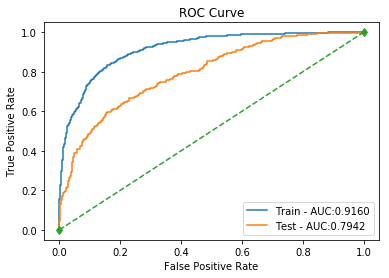

In [43]:
import warnings
warnings.filterwarnings("ignore")

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

model_metrics(xgb, X_train, X_test, y_train, y_test)

> ### 5.5.1 使用步长值为 0.1 进行网格搜索（需在不断进行迭代，降低 lr 学习率，调整迭代次数）

In [44]:
param_test = {'n_estimators':range(20,200,20)}
gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 40}, 0.7821475660234114)

> ### 5.5.2 对 max_depth、min_child_weight参数进行调优

In [45]:
param_test = {'max_depth':range(3,10,2), 'min_child_weight':range(1,12,2)}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.7862484237996348)

> ### 5.5.3 对 max_depth、min_child_weight 进一步调优

In [46]:
param_test = {'max_depth':[3,4,5], 'min_child_weight':[3,4,5]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.7862484237996348)

> ### 5.5.4 对 gamma 参数进行调优

In [47]:
param_test = {'gamma':[i/10 for i in range(1,6)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=5, 
                                                  min_child_weight=5, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'gamma': 0.1}, 0.7861741398861711)

> ### 5.5.5 对 subsample、colsample_bytree 参数进行调优（步长为0.1）

In [48]:
param_test = {'subsample':[i/10 for i in range(5,10)], 'colsample_bytree':[i/10 for i in range(5,10)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=5, 
                                                  min_child_weight=5, gamma=0.4, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.7863738296099025)

> ### 5.5.6 进一步调整 subsample、colsample_bytree（步长缩小为0.05）

In [49]:
param_test = { 'subsample':[i/100 for i in range(85,101,5)], 'colsample_bytree':[i/100 for i in range(85,101,5)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=5, 
                                                  min_child_weight=5, gamma=0.4, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'colsample_bytree': 0.95, 'subsample': 0.9}, 0.7887290514938936)

> ### 5.5.7 对 reg_alpha 正则化参数进行调优

In [50]:
param_test = {'reg_alpha':[1e-5, 1e-2, 0.1, 0, 1, 100]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=20, max_depth=5, \
                                                  min_child_weight=5, gamma=0.4, subsample=0.95, \
                                                  colsample_bytree=0.9, objective= 'binary:logistic', \
                                                  nthread=4,scale_pos_weight=1, seed=27), \
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'reg_alpha': 1}, 0.7837662232719322)

> ### 5.5.8 降低学习率，调整迭代次数

In [51]:
param_test = {'n_estimators':range(20,200,20)}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.01, n_estimators=60, max_depth=3, 
                                                  min_child_weight=5, gamma=0.4, subsample=0.5, 
                                                  colsample_bytree=0.9, reg_alpha=1, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=27), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 180}, 0.7840798183632296)

> ### 5.5.9 观测最终调优结果

【Accuracy准确率】 训练集： 0.8046 测试集： 0.7933
【Prediction精准率】 训练集： 0.7987 测试集： 0.7377
【Recall召回率】 训练集： 0.3024 测试集： 0.2550
【F1-score】 训练集： 0.4387 测试集： 0.3789
【AUC取值】 训练集： 0.8260 测试集： 0.7954


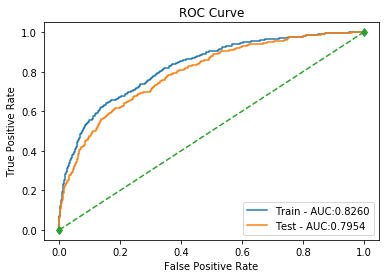

In [52]:
xgb = XGBClassifier(learning_rate =0.01, n_estimators=180, max_depth=3, min_child_weight=10, 
                    gamma=0.4, subsample=0.5, colsample_bytree=0.9, reg_alpha=1, 
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27)
xgb.fit(X_train, y_train)
model_metrics(xgb, X_train, X_test, y_train, y_test)

### Summary

|模型Model|模型调参ModelParas|准确率Acc|AUC取值|
|:---|:---|:---|:---|:---|
|LR逻辑回归|GridSearchCV(lr, param_grid = param,scoring ='roc_auc', cv=5)|训练集： 0.7977 测试集： 0.8094|训练集： 0.8023 测试集： 0.7980|
|svm_linear|GridSearchCV(svm_linear, param_grid = param,scoring ='roc_auc', cv=5)|训练集： 0.7839 测试集： 0.7898|训练集： 0.7713 测试集： 0.8046|
|svm_poly|GridSearchCV(svm_poly, param_grid = param,scoring ='roc_auc', cv=5)|训练集：0.7854 测试集： 0.7919|训练集： 0.8042 测试集： 0.8097|
|svm_rbf|GridSearchCV(svm_poly, param_grid = param,scoring ='roc_auc', cv=5)|训练集：0.7475 测试集： 0.7526|训练集： 0.8603 测试集： 0.7941|
|svm_sigmoid|GridSearchCV(svm_sigmoid, param_grid = param,scoring ='roc_auc', cv=5)|训练集：0.7475 测试集： 0.7526|训练集：0.7768 测试集： 0.8011|
|决策树|GridSearchCV(DecisionTreeClassifier(max_depth=11,min_samples_split=550,min_samples_leaf=80, max_features='sqrt', random_state =2018), param_grid = param,scoring ='roc_auc', cv=5)|训练集： 0.7788 测试集： 0.7666|训练集： 0.7576 测试集： 0.7382|
|随机森林|GridSearchCV(estimator = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50, min_samples_leaf=20, max_features = 9,random_state=2018), param_grid = param_test, scoring='roc_auc', cv=5)|训练集： 0.8118 测试集： 0.7940|训练集： 0.8952 测试集： 0.7883|
|XGBoost|GridSearchCV(estimator = XGBClassifier(learning_rate =0.01, n_estimators=60, max_depth=3, min_child_weight=5, gamma=0.4, subsample=0.5, colsample_bytree=0.9, reg_alpha=1, objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27), param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)|训练集： 0.8046 测试集： 0.7933|训练集： 0.8260 测试集： 0.7954|

> #### 通过对比模型评估之间的差异并且通过模型调优进行迭代，进一步利用模型融合的方法改善模型性能

### Conference

> ### [机器学习项目构建之模型调优](https://blog.csdn.net/Crafts_Neo/article/details/80489358)